### 월간 코드 챌린지 시즌2 > [2개 이하로 다른 비트](https://school.programmers.co.kr/learn/courses/30/lessons/77885)

1. 숫자를 입력받으면 bit 형식으로 변환  
2. 끝에서부터 0이 있다면 1을 추가하고, 그 숫자를 반환  
3. 0이 하나도 없다면 다음 비트의 숫자를 반환  

In [ ]:
num = 7

# 2비트 변환
binary = bin(num)[2:].zfill(2)
print(binary)

# 10진수 숫자로 변환
decimal = int(binary, 2)
print(decimal)

In [ ]:
def solution(numbers):
    answers = []
    for number in numbers :
        binary = bin(number)[2:]
        answer = str(binary)
        for i in range(len(binary), 0, -1):
            if binary[i-1] == '0':
                prefix = answer[:i-1] + '1'
                target = answer[i:]
                if '1' in target:
                    zero_idx = target.index('1')
                    target = target[:zero_idx] + '0' + target[zero_idx+1:]
                answer = prefix + target
                
                answers.append(int(answer, 2))
                break
        if answer == binary:
            answers.append(2 ** len(binary) - 2 ** (len(binary)-1) + int(answer,2))
    return answers        

In [ ]:
solution([2,7])

In [ ]:
solution([4321, 5324, 1111, 444, 666])

In [ ]:
bin(1112)[2:]

In [ ]:
bin(1111)[2:]

In [ ]:
bin(1115)[2:]

### 2022 KAKAO TECH INTERNSHIP > [두 큐 합 같게 만들기](https://school.programmers.co.kr/learn/courses/30/lessons/118667?language=python3)

1. 두 큐의 합 확인
- 두 큐의 합이 홀수면 return -1
2. 두 큐의 합이 짝수인 경우
- 하위 집합 중 그 합이 절반에 해당하는 경우가 존재하지 않으면 return -1
3. 하위 집합 중 일치하도록 처리

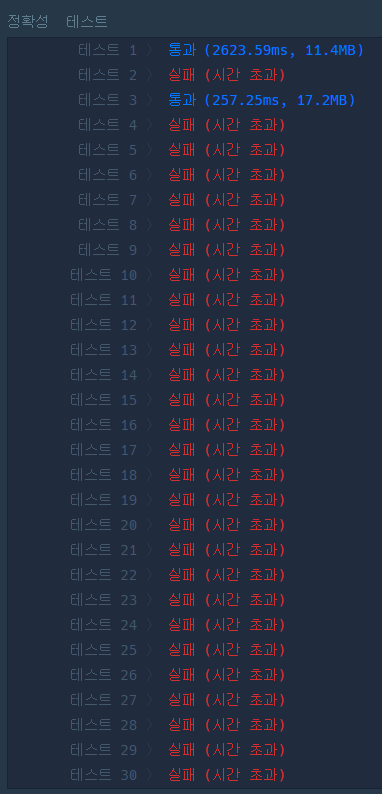

In [51]:
from itertools import combinations
from collections import deque

def solution(queue1, queue2):
    both = queue1 + queue2
    if sum(both) % 2 == 1:
        return -1
    
    half = sum(both) // 2
    halfs = []
    for r in range(1, len(both)+1):
        target = [sorted(list(x)) for x in combinations(both, r) if sum(x) == half]
        halfs = halfs+target if target not in halfs else halfs

    if not halfs:
        return -1
    
    queue = deque([(queue1, queue2, 0)])
    history = [queue1, queue2]
    while queue:
        queue1, queue2, cnt = queue.popleft()
        
        # case 1 : q1 → q2
        queue3 = queue1[1:]
        queue4 = queue2 + queue1[:1]
        if queue3 not in history and queue4 not in history:
            if sum(queue3) == half:
                print(f'answer1 :{queue3=}, {queue4=}')
                return cnt + 1
            queue.append((queue3, queue4, cnt+1))
            history = history + queue3 + queue4
        
        # case 2 : q2 → q1
        queue3 = queue1 + queue2[:1]
        queue4 = queue2[1:]
        if queue3 not in history and queue4 not in history:
            if sum(queue3) == half:
                print(f'answer2 :{queue3=}, {queue4=}')
                return cnt + 1
            queue.append((queue3, queue4, cnt+1))
            history = history + queue3 + queue4

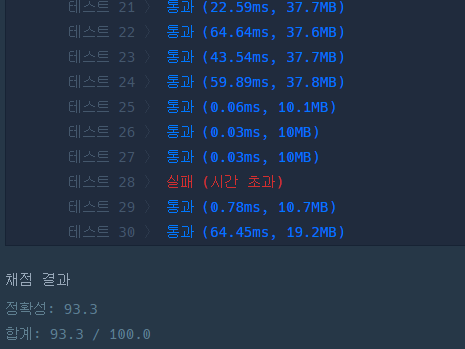

- 조금 더 간단하면서도 빠르게 동작할 수 있는 queue 구조 구현 : 두 문제가 여전히 안풀림.
- 원소를 넣고 빼는 과정에서 딜레이가 심함
-> 문제 자체는 row18의 queue2.append(q)를 주석처리하면 전부 풀리긴 하나, 이는 올바른 해법이 아님. 그저 테스트 케이스가 없을뿐

In [ ]:
from collections import deque

def solution(queue1, queue2):
    target = sum(queue1+queue2) // 2
    left_sum = sum(queue1)
    
    queue1, queue2 = deque(queue1), deque(queue2)
    answer = 0
    while queue1 and queue2:
        if left_sum < target:
            q = queue2.popleft()
            left_sum += q
            queue1.append(q)
            answer += 1
        elif left_sum > target:
            q = queue1.popleft()
            left_sum -= q
            queue2.append(q)
            answer += 1
        else :
            return answer
    return -1

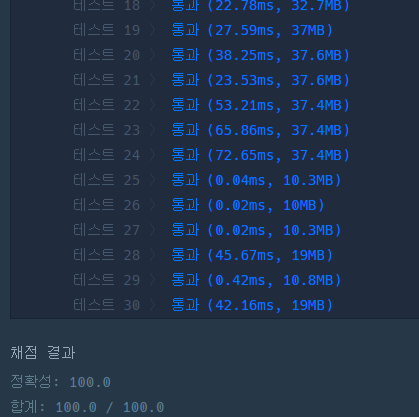

- two point를 활용해 문제 풀이 : 그러면 반복된 요소 넣고 빼는 과정을 생략할 수 있음

In [27]:
def solution(queue1, queue2):
    target = sum(queue1+queue2) // 2
    left_sum = sum(queue1)
    
    queue = queue1 + queue2 + queue1
    q1, q2 = 0, len(queue1)-1
    answer = 0
    while q1 <= q2:
        if left_sum < target:
            q2 += 1
            if q2 >= len(queue):
                return -1
            left_sum += queue[q2]
        elif left_sum > target:
            left_sum -= queue[q1]
            q1 += 1
        else:
            return answer
        answer += 1
        
    return -1

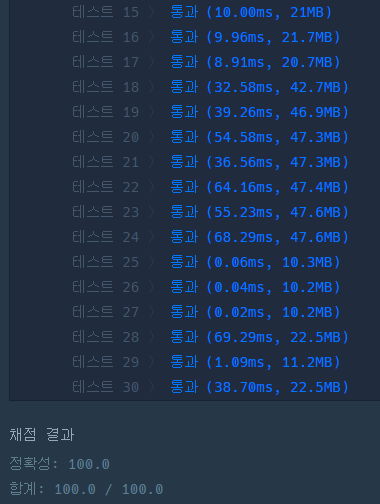

- 더할 값을 뺐다가 다시 append하는게 문제가 생기니 아예 두 큐를 사전에 합쳐놓고 진행

In [34]:
from collections import deque

def solution(queue1, queue2):
    target = sum(queue1+queue2) // 2
    left_sum = sum(queue1)
    
    add_seq = deque(queue2+queue1)
    sub_seq = deque(queue1+queue2)
    answer = 0
    while add_seq and sub_seq:
        if left_sum == target:
            return answer
        elif left_sum > target:
            left_sum -= sub_seq.popleft()
        elif left_sum < target:
            left_sum += add_seq.popleft()
        answer += 1
    return -1  

In [35]:
queue1 = [3,2,7,2]
queue2 = [4,6,5,1]
solution(queue1, queue2)

deque([4, 6, 5, 1, 3, 2, 7, 2])


4

In [16]:
queue1 = [1,2,1,2]
queue2 = [1,10,1,2]
solution(queue1, queue2)

7

### 월간 코드 챌린지 시즌1 > [쿼드압축 후 개수 세기](https://school.programmers.co.kr/learn/courses/30/lessons/68936)

In [52]:
def solution(arr):
    answer = []
    target = sum([sum(x) for x in arr])
    N = len(arr)
    if target in [0, N*N]:
        return [1,0] if target == 0 else [0,1]        
    
    arrs = [arr]
    while arrs:
        arr = arrs.pop()
        N = len(arr) // 2
        
        top, bottom = arr[:N], arr[N:]
        top = [list(x) for x in zip(*top)]
        bottom = [list(x) for x in zip(*bottom)]
        
        top_left, top_right = top[:N], top[N:]
        bottom_left, bottom_right = bottom[:N], bottom[N:]
        for piece in [top_left, top_right, bottom_left, bottom_right]:
            target = sum([sum(x) for x in piece])
            if target in [0, N*N]:
                print(target)
                answer.append(piece[0][0])
            else :
                arrs.append(piece)
    
    return [answer.count(0), answer.count(1)]

In [53]:
arr = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
solution(arr)

[0, 1]

In [49]:
arr = [[1,1,0,0],[1,0,0,0],[1,0,0,1],[1,1,1,1]]
solution(arr)

0
0
1
1
1
1
1
0
1
1
1
1
0


[4, 9]

In [50]:
arr = 	[[1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 1]]
solution(arr)

16
0
0
0
1
1
1
1
1
0
1
1
0
1
1
4
0
0
0
0
1
1
1
0
1


[10, 15]